In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
df = pd.read_csv('Bitfinex_BTCEUR_trades_2018_02_02.csv')
df.head()



,id,exchange,symbol,date,price,amount,sell
0,183601815,bf,btceur,1517529608000,7349.60000,0.004568,False
1,183601825,bf,btceur,1517529609000,7354.68045,0.010000,True
2,183601823,bf,btceur,1517529609000,7354.68045,0.004568,True
3,183601833,bf,btceur,1517529610000,7354.60000,0.102395,False
4,183601904,bf,btceur,1517529626000,7343.40750,0.086580,False


In [7]:
np.array(df['price'])
def ExponentialWeightedMean (values, window):
    weights = np.exp(np.linspace(-1,0,window))
    weights /= weights.sum()
    
    a = np.convolve(values,weights) [:len(values)]
    a [:window] = a[window]
    return a

ExponentialWeightedMean(df['price'], 7)

array([7352.29057407, 7352.29057407, 7352.29057407, ..., 7133.81348582,
       7131.85300745, 7129.53704967])

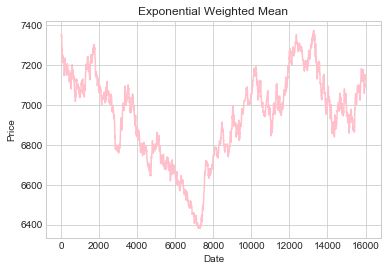

In [23]:
import numpy as np
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 16000, 15715)
y = ExponentialWeightedMean(df['price'],7)
plt.plot(x,y, color = 'pink')
plt.title('Exponential Weighted Mean')
plt.xlabel('Date')
plt.ylabel('Price');

 ## Time based features
    